pz = -1.2066666666666666
Bulk-state LLL energy = -0.155362219573
0.407686080641
Bulk-state LLL energy = -0.155362219573
No energies around the bulk LLL
0.0442370050173
Bulk-state LLL energy = -0.155362219573
No energies around the bulk LLL
0.82165309493


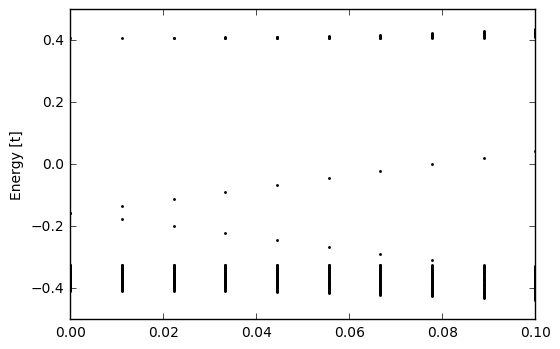

ValueError: f(a) and f(b) must have different signs

In [7]:
import diagonalizer
from diagonalizer import diagonalize_1D, density_plot_1D, pSweep_1D, spectrum_plot_1D, FermiVelocityZQL

import numpy as np
from numpy import pi
from copy import copy
# for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt


SitesCount_XDefault = 1200
fsys_1D = diagonalizer.FinalizedSystem_1D(SitesCount_XDefault)

ParametersSet5 = diagonalizer.SimpleNamespace( tp=2., t=1., tzp=1., tz=1., M0= 0., FermiEnergy = 0., \
                     betaz=3., b0=0.1, pzNode2 = -1.6954156, EnergyNode2 = 0.033074835, \
                     Rescale_hop0 = 1.0, Rescale_onsite0 = 1.0, Rescale_onsite1 = 1.0, \
                     lBinv2=0., x_shift= (SitesCount_XDefault - 1.)/2., \
                     EigenvectorsCount = 50, EnergyPrecision = 10**(-5), WavefunctionComponents = 4, \
                     py = 0., pz = 0. )

params = copy(ParametersSet5)
params.lBinv2 = 1. / 80.**2

pzStart = -1.64
pzEnd = 1.74
GridNumber = 40

params.pz = pzStart + 5 * (pzEnd - pzStart) / (GridNumber-1)

print('pz =', params.pz)

print(diagonalizer.ZerothLLEnergyQL(0., fsys_1D, params, debug = True))
print(diagonalizer.ZerothLLEnergyQL(0.1, fsys_1D, params, debug = True))
print(diagonalizer.ZerothLLEnergyQL(0.5, fsys_1D, params, debug = True))

evals, evecs = pSweep_1D( fsys_1D, params, 0., 0.1, pCount=10, yORzSweep = 'pySweep')
spectrum_plot_1D(evals, 0., 0.1, pCount=10)

print(FermiVelocityZQL(fsys_1D, params, pyGuess = 0.5, debug = True))